<a href="https://colab.research.google.com/github/Nicolaser1102/regresion_logistica/blob/main/Tareas_Week7/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CODING DOJO
Fecha creación:20/2/2022

Fecha de actualización: 20/2/2022

Esteban Simbaña

¿Regresión logística, bosque aleatorio o KNN?

Primero empezaremos con montar los datos y librerías

In [186]:
#Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [187]:
#Montamos los datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week3-Track2/Deberes/wine.data'
df = pd.read_csv(nombrearchivo, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [189]:
#Asignamos a un alista los nombres de las columnas
df_columnas = ['Class_label', 'Alcohol', 'Malic acid','Ash','Alcalinity of ash', 
                'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [190]:
#Cambiamos el nombre de las columnas
df = df.set_axis(df_columnas, axis=1)
df.head()

,Class_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Limpieza de datos 

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [192]:
df.describe()

,Class_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


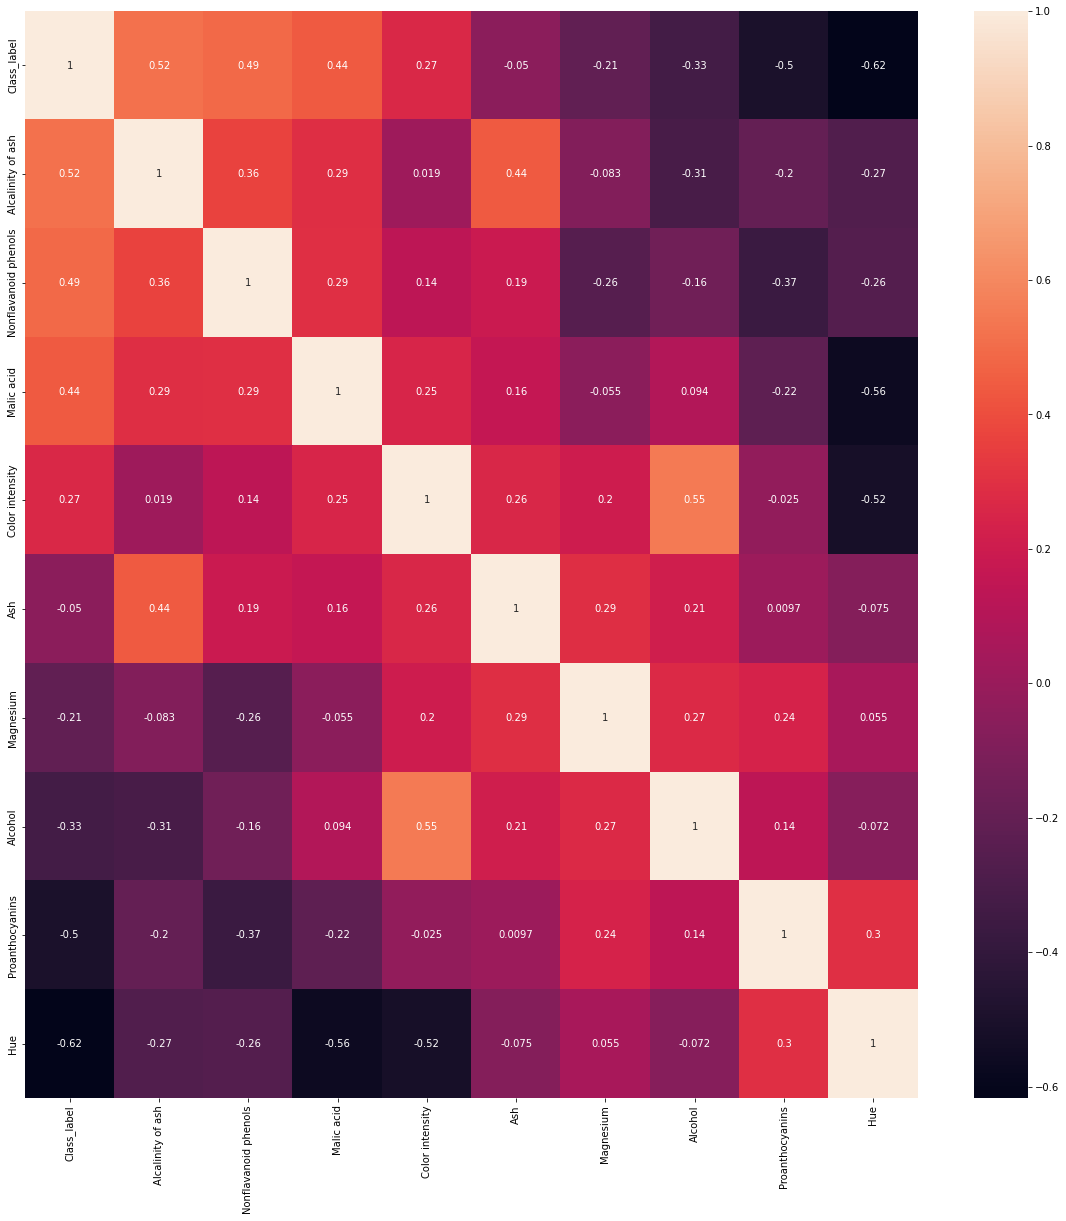

In [193]:
corr = df.corr()
corr_cols = corr['Class_label'].sort_values(ascending = False).head(10).index
corr_classlabel = df[corr_cols].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corr_classlabel, annot = True)

Por lo pronto se considera que la base de datos está lista para ser usada para los distintos modelos de predicción 

# Tarea
Utilizando el wine cultivars dataset de la sección de clasificación multiclase, tu tarea es utilizar modelos de regresión logística (uno frente a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

Obtenemos las variables independientes y la variable dependiente a usar

In [194]:
#Valores en X
X = df.drop(['Class_label'], axis=1)
X.head(1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [195]:
#valores en y 
y = df['Class_label']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class_label, Length: 178, dtype: int64

# Regresión logística 

## Regresión logística con penalidad l1 y estrategia uno contra uno 

In [196]:
from sklearn import linear_model #importamos modelo de regresión lineal

In [197]:
X.shape

(178, 13)

In [198]:
y.shape #tenemos las mismas dimensiones

(178,)

In [199]:
logit_model_l1_ovo = linear_model.LogisticRegression(penalty='l1',
                        C=1.0,
                        multi_class='multinomial', solver='saga')
#multinomial = estrategia uno contra uno
#el solver saga nos permite combinar (multinomial+l1) sin tener errores

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [201]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
logit_model_l1_ovo.fit(X_train,y_train) #entrenamos nuestro modelo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga')

### Validación cruzada (Regresión logística con penalidad l1 y estrategia "uno contra uno")

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#importamos librerías para realizar validación cruzada

In [204]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [205]:
# evaluar el modelo y recopilar las puntuaciones
n_scores_l1_ovo = cross_val_score(logit_model_l1_ovo, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)

In [206]:
#importamos librerías para obtener  el promedio y la desviación estandar de los datos 
#que ocupemos
from numpy.core.fromnumeric import std
from numpy.ma.core import mean
# informar el rendimiento del modelo

print('Precisión media:% .3f (% .3f)' % (mean(n_scores_l1_ovo), std(n_scores_l1_ovo)))

Precisión media: 0.692 ( 0.084)


Obtenemos una precisión media de 69,2 % 

# Regresión logística con penalidad l1 y estrategia uno contra todos 

In [207]:
logit_model_l1_ovr = linear_model.LogisticRegression(penalty='l1',
                        C=1.0,
                        multi_class='ovr', solver='liblinear')
# 'ovr' = uno contra todos
#lib linear = nos permite trabajar bien con (ovr + l1)

In [208]:
logit_model_l1_ovr.fit(X_train,y_train) #entrenamos nuestro modelo

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

### Validación cruzada (Regresión logística con penalización l1 y estrategia "uno contra todos ")

In [209]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [210]:
# evaluar el modelo y recopilar las puntuaciones

n_scores_l1_ovr = cross_val_score(logit_model_l1_ovr, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)

In [211]:
#informar el rendimiento del modelo

print('Precisión media:% .3f (% .3f)' % (mean(n_scores_l1_ovr), std(n_scores_l1_ovr)))

Precisión media: 0.953 ( 0.048)


Obtenemos una precisión media del 95,3 % 

## Regresión logística con penalidad l2 y estrategia uno contra uno

In [212]:
logit_model_l2_ovo = linear_model.LogisticRegression(penalty='l2',
                        C=1.0,
                        multi_class='multinomial', solver='lbfgs')
# multinomial = uno contra uno 
# lbfgs nos permite trabajar con (multinomial +l2)

In [213]:
logit_model_l2_ovo.fit(X_train,y_train) #entrenamos nuestro modelo

LogisticRegression(multi_class='multinomial')

### Validación cruzada (Regresión logística con penalización l2 y estrategia "uno contra uno ")

In [214]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [215]:
# evaluar el modelo y recopilar las puntuaciones

n_scores_l2_ovo = cross_val_score(logit_model_l2_ovo, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)

In [216]:
# informar el rendimiento del modelo
print('Precisión media:% .3f (% .3f)' % (mean(n_scores_l2_ovo), std(n_scores_l2_ovo)))

Precisión media: 0.951 ( 0.053)


Obtenemos un 95,1% de precisión media

## Regresión logística con penalidad l2 y estrategia uno contra todos

In [217]:
logit_model_l2_ovr = linear_model.LogisticRegression(penalty='l2',
                        C=1.0,
                        multi_class='ovr', solver='liblinear')
# ovr = uno contra todos
# liblinear nos permite trabajar con (ovr + l2)

In [218]:
logit_model_l2_ovr.fit(X_train,y_train) #entrenamos nuestro modelo

LogisticRegression(multi_class='ovr', solver='liblinear')

In [219]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [220]:
# evaluar el modelo y recopilar las puntuaciones

n_scores_l2_ovr = cross_val_score(logit_model_l2_ovr, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)

In [221]:
# informar el rendimiento del modelo
print('Precisión media:% .3f (% .3f)' % (mean(n_scores_l2_ovr), std(n_scores_l2_ovr)))

Precisión media: 0.953 ( 0.048)


Obtenemos un 95,3% de precisión media

# Implementación de  Bagged tree y Random Forest y modelos KNN aplicados en la base de datos 

## Bagged tree

In [222]:
import sklearn
#importamos la librerías que necesitamos
from sklearn.ensemble import BaggingClassifier

In [223]:
bagged_tree = BaggingClassifier(random_state= 0) #instanciamos el modelo

In [224]:
bagged_tree.fit(X_train,y_train) #entrenamos nuestro modelo

BaggingClassifier(random_state=0)

In [225]:
score = bagged_tree.score(X_test, y_test)
score # puntuamos el modelo según R2

0.9814814814814815

### Validación cruzada (Bagged Tree)

In [226]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo y recopilar las puntuaciones

n_scores_baggedtree = cross_val_score(bagged_tree, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)
# informar el rendimiento del modelo
print('Precisión media:% .3f (% .3f)' % (mean(n_scores_baggedtree), std(n_scores_baggedtree)))

Precisión media: 0.964 ( 0.040)


Se obitene un modelo muy bueno del 0.95% de probabilidad de acertar

## Random Forest

In [227]:
#importamos librería para random forest 
from sklearn.ensemble import RandomForestClassifier

In [228]:
random_forest_model = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True, random_state= 0) #todos estos valores ya están incluidos por defecto

In [229]:
#entrenamos el modelo
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [230]:
#puntuamos el modelo
score = random_forest_model.score(X_test, y_test)
score

1.0

In [231]:
random_forest_model.oob_score_

0.9596774193548387

El puntaje se reduce al buscar el Error de generalización (out-of-sample error) del modelo por lo que los datos infiere que están bastante bien equlibrados 

### Validación cruzada (Random Forest)

In [232]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo y recopilar las puntuaciones

n_scores_randomforest = cross_val_score(random_forest_model, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)
# informar el rendimiento del modelo
print('Precisión media:% .3f (% .3f)' % (mean(n_scores_randomforest), std(n_scores_randomforest)))

Precisión media: 0.979 ( 0.027)


## Modelo KNN 

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
#importamos librerías para la estandarización de datos
from sklearn.preprocessing import StandardScaler

In [235]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
from pandas.core.common import random_state
knn_clas = KNeighborsClassifier(n_neighbors=5 , weights = 'distance' , p = 1)

In [237]:
knn_clas.fit(X_train,y_train)

KNeighborsClassifier(p=1, weights='distance')

In [238]:
knn_clas.score(X_test,y_test)

0.9814814814814815

Por otro lado se observa que el modelo knn es el que nos muestra un peor puntaje R2.

### Validación cruzada (KNN Classifier)

In [239]:
#Puntuamos el modelo 
# definir el procedimiento de evaluación del modelo

CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo y recopilar las puntuaciones

n_scores_knn = cross_val_score(knn_clas, X, y, scoring= 'accuracy', cv = CV, n_jobs=-1)
# informar el rendimiento del modelo
print('Precisión media:% .3f (% .3f)' % (mean(n_scores_knn), std(n_scores_knn)))

Precisión media: 0.804 ( 0.078)


### Preguntas para pensar y responder

Después de completar la tarea, responde las siguientes preguntas:



**¿Qué modelo funcionó mejor?**

- El modelo de random forest funcionó mejor que los otros modelos para esta base de datos, ya que obtuvo un puntaje de precisión media de 97,9 %, y con una variación estándar de 0,027 lo que representa la no considerable existencia de dispersión en los datos. 


**¿Cuáles son las características más importantes de tus modelos?**


- Una de las característica más importantes es que la mayoría tienen una precisión mayor al 90%, por lo que podemos aclarar que el modelo no está muy sobreajustado; y lo podemos afirmar por la aplicación en varios modelos obteniendo un buen nivel de precisión.

- La mayoría de los modelos (los que no fueron parte del modelo de "regresión logística"), mostraron sin tener un mayor ajuste de los hyperparámetros un gran y buen rendimiento.



**¿Hay algún modelo que te haya gustado más y por qué?**

- Me gustó mucho el modelo de random forest ya que en este caso la base de datos que nos entregan está lista para ser entrenada en los modelos que requeramos, por lo que se me hizo muy fácil implementarlo; "si entrenamos buena información en un modelo complejo, obtendremos buena información igual por parte de los datos que vamos a predecir".

Código inspirado de: 
- https://topbigdata.es/regresion-logistica-multinomial-con-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://www.analyticslane.com/2021/11/08/pandas-renombrar-columnas-en-pandas/
- Plantillas de 'Coding Dojo'